<a href="https://colab.research.google.com/github/cvillarr123/marketingKPI/blob/main/PROYECTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
!pip install kneed

In [107]:
#0.- Librerias 

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd 
import random
from google.colab import drive
from google.colab import auth
auth.authenticate_user()
import gspread
#from oauth2client.client import GoogleCredentials
#gc = gspread.authorize(GoogleCredentials.get_application_default())
#drive.mount('/content/drive')
import datetime
import seaborn as sns
import math 
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import plotly.graph_objs as go
import plotly as py
import plotly.express as px
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as pgo
import sklearn.model_selection as model_selection
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as model_selection 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector
from sklearn.naive_bayes import ComplementNB 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.base import TransformerMixin


**Datos:**

1.   Year :   Anio de corte
2.   Month :   Mes de corte 
2.   Year&month:  Anio y mes
2.   Adsetstarttime: tiempo de inicio de config de la propaganda
2.   Adsetendtime:  tiempo de fin de la propaganda
2.   Campaignobjective:  objetivo de la campaña
2.   Campaignname:  nombre de la campaña
2.   AdsetID:  identificador de la propaganda
2.   Adsetname: nombre de la propaganda
2.   AdID: id de la propaganda
2.   Promotedposttype: tipo de post de promocion link, video, etc.
2.   Promotedpostmessage: mensaje en el post de promocion
2.   Cost: valor o costo de haber puesto la propaganda
2.   Impressions:  numero de veces que se mostro la propaganda
2.   Reach: numero de personas únicas que vieron la publicacion.
2.   Frequency: veces que ha visto la publicacion frecuencia ( Impressions / Reach )
2.   Adname: nombre de la propaganda
2.   Linkclicks: cuantas veces ha dado click en la publicación
2.   Costperon-Facebooklead : costo por lead (persona q lleno el formulario o consultaron el producto)
2.   Uniqueleads: leads que ha generado

In [201]:
#path='/content/drive/My Drive/PROYECTO DATA SCIENCE/Data/DATA.xlsx'
path='DATA DRIVE.xlsx'
data = pd.read_excel(path,sheet_name='EDAD Y GENERO')
data.sample(10)
data[['Year','Month']] = data['Year & month'].str.split('|',expand=True)
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             3031 non-null   int64  
 1   Year & month                     3031 non-null   object 
 2   Campaign ID                      3031 non-null   int64  
 3   Campaign name                    3031 non-null   object 
 4   Campaign objective               3031 non-null   object 
 5   Ad set ID                        3031 non-null   int64  
 6   Ad set name                      3031 non-null   object 
 7   Ad ID                            3031 non-null   int64  
 8   Ad name                          3031 non-null   object 
 9   Promoted post type               3031 non-null   object 
 10  Promoted post created date       3031 non-null   int64  
 11  Promoted post description        2622 non-null   object 
 12  Promoted post messag

In [202]:
data.head()

,Year,Year & month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Month
0,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,female,0.00,4,4,1.00,0,0,0.00,NaN,1
1,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,0.10,69,56,1.23,0,0,1.45,NaN,1
2,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,0.19,18,18,1.00,0,0,10.56,NaN,1
3,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1
4,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,0.04,17,13,1.31,0,0,2.35,NaN,1


In [203]:
filter1 = data.Year == 2021  
filter2 = data.Age != 'Unknown'
filter3 = data["Campaign objective"] == "LEAD_GENERATION"

##filter3 = df_inicial.Month.isin([4,5,6,7])  
data = data[  filter1 & filter2 & filter3 ]
data.tail()



,Year,Year & month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Month
3026,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,45-54,male,0.10,90,84,1.07,0,0,1.11,NaN,7
3027,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,55-64,female,0.00,2,2,1.00,0,0,0.00,NaN,7
3028,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,55-64,male,0.13,60,52,1.15,0,0,2.17,NaN,7
3029,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,65+,female,0.01,1,1,1.00,0,0,10.00,NaN,7
3030,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,65+,male,0.03,30,25,1.20,0,0,1.00,NaN,7


In [204]:
# remover espacios en el nombre de las columnas
data.columns = data.columns.str.replace(' ', '')

# Click-through-rate  Porcentaje de las impresiones que se volvieron clicks
data['CTR'] = data['Linkclicks'] / data['Impressions'] *100
data.tail()

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,Month,CTR
3026,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,45-54,male,0.10,90,84,1.07,0,0,1.11,NaN,7,0.0
3027,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,55-64,female,0.00,2,2,1.00,0,0,0.00,NaN,7,0.0
3028,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,55-64,male,0.13,60,52,1.15,0,0,2.17,NaN,7,0.0
3029,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,65+,female,0.01,1,1,1.00,0,0,10.00,NaN,7,0.0
3030,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,65+,male,0.03,30,25,1.20,0,0,1.00,NaN,7,0.0


Incluir el numero de palabras

In [205]:
data['NumPalabras'] = data.Promotedpostmessage.str.split().str.len()

Borrar los que no tienen Edad

In [206]:
#borrar los que tienen Unknown en Age
data = data[data.Age != 'Unknown']

In [207]:
#data['Descripcion'] = data['Promotedpostdescription'] 
data['Message'] = data['Promotedpostmessage'] 
data['Caption'] = data['Promotedpostcaption'] 
#data['NumDescripcion'] = data.Descripcion.str.split().str.len()
data['NumMessage'] = data.Message.str.split().str.len()
data['NumCaption'] = data.Caption.str.split().str.len()
data['Rate'] = data['Uniqueleads']/data['Reach'] 

In [208]:
data =data.dropna(subset=["Costperon-Facebooklead"])
q1= np.percentile(data["Costperon-Facebooklead"], 25)  
q2= np.percentile(data["Costperon-Facebooklead"], 50)
q3= np.percentile(data["Costperon-Facebooklead"], 75) 

data['Clasificacion'] = "Ninguno"
data['ClasificacionInt'] = 0

In [209]:
data['Clasificacion'].loc[(data['Costperon-Facebooklead']<= q1)] = "Mejores"
data['Clasificacion'].loc[(data['Costperon-Facebooklead']> q1 ) & (data['Costperon-Facebooklead'] <= q3)] = "Regulares"
data['Clasificacion'].loc[(data['Costperon-Facebooklead']> q3 )] = "Peores"


data['ClasificacionInt'].loc[(data['Costperon-Facebooklead']<= q1)] = 2
data['ClasificacionInt'].loc[(data['Costperon-Facebooklead']> q1 ) & (data['Costperon-Facebooklead'] <= q3)] = 1
data['ClasificacionInt'].loc[(data['Costperon-Facebooklead']> q3 )] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A v

In [210]:
data.head(5)

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,Month,CTR,NumPalabras,Message,Caption,NumMessage,NumCaption,Rate,Clasificacion,ClasificacionInt
3,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1,1.327434,25,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,25,6,0.005181,Mejores,2
13,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,0.303819,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.001188,Regulares,1
15,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,3.67,1749,1172,1.49,4,2,2.10,1.84,1,0.228702,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.001706,Regulares,1
16,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,21.01,15951,9362,1.70,73,8,1.32,2.63,1,0.457652,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.000855,Regulares,1
18,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,1.94,795,516,1.54,10,3,2.44,0.65,1,1.257862,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.005814,Mejores,2


# **AEDA**

In [211]:
# añadir edad mediana y codigo de género para concatenarlo al Ad set ID y hacerlo unico
import plotly.express as px

fig1 = px.bar(data, x='Age', y='Uniqueleads', height=300,
              title='Stacked Bar Chart - Hover on individual items')
fig2 = px.histogram(data, x='Age', y='Uniqueleads', histfunc='sum', height=300,
                    title='Histogram Chart')
fig1.show()
fig2.show()

In [212]:
# añadir edad mediana y codigo de género para concatenarlo al Ad set ID y hacerlo unico
import plotly.express as px

fig1 = px.bar(data, x='Clasificacion', y='Uniqueleads', height=300,
              title='Stacked Bar Chart - Hover on individual items')
fig2 = px.histogram(data, x='Clasificacion', y='Uniqueleads', histfunc='sum', height=300,
                    title='Histogram Chart')
fig1.show()
fig2.show()

In [213]:
fig1= px.histogram(data, x='Age', y='Uniqueleads', histfunc='sum', height=300,
                    title='Histogram Chart')
fig1.show()


In [214]:
# añadir edad mediana y codigo de género para concatenarlo al Ad set ID y hacerlo unico
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(go.Histogram(
    x=np.log(data[data.Gender=='male']['Uniqueleads']),
    name='male',
    bingroup=1))

fig.add_trace(go.Histogram(
    x=np.log(data[data.Gender=='female']['Uniqueleads']),
    name='female',
    bingroup=1))

fig.update_layout(
    barmode="overlay",
    title="Histograma del Log de Uniqueleads",
    bargap=0.1)

fig.show()

In [215]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(data, x="Uniqueleads", color="Gender", marginal="box", # can be `box`, `violin`
                         hover_data=data.columns)
fig.show()

https://rpubs.com/nicokaswalder/614266


https://www.kaggle.com/marcogdepinto/2016-presidential-elections-on-facebook


In [216]:
data.describe()

,Year,CampaignID,AdsetID,AdID,Promotedpostcreateddate,Adsetstarttime,Adsetendtime,Targetingminimumage,Targetingmaximumage,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,Month,CTR,NumPalabras,NumMessage,NumCaption,Rate,ClasificacionInt
count,534.0,5.340000e+02,5.340000e+02,5.340000e+02,534.000000,534.000000,4.0,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,2021.0,2.384592e+16,2.384640e+16,2.384684e+16,44334.820225,44182.837079,44364.0,22.505618,56.091760,14.122097,7623.638577,4243.975655,1.564139,43.243446,6.245318,2.300356,2.289419,4.220974,0.942549,34.853933,34.853933,5.584270,0.005232,1.000000
std,0.0,1.587422e+11,8.117494e+11,6.967310e+11,36.879876,105.816195,0.0,1.433637,9.657406,24.865132,14721.019120,7292.928345,0.447484,76.624818,11.086295,1.539774,1.747724,2.091673,1.566927,10.315893,10.315893,2.253914,0.021279,0.709094
min,2021.0,2.384591e+16,2.384591e+16,2.384591e+16,44272.000000,44118.000000,44364.0,18.000000,44.000000,0.020000,4.000000,3.000000,1.000000,0.000000,1.000000,0.750000,0.020000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000232,0.000000
25%,2021.0,2.384591e+16,2.384591e+16,2.384615e+16,44327.000000,44118.000000,44364.0,21.000000,44.000000,1.760000,788.000000,552.000000,1.240000,5.000000,1.000000,1.510000,1.145000,2.000000,0.426962,30.000000,30.000000,4.000000,0.000973,0.250000
50%,2021.0,2.384591e+16,2.384591e+16,2.384664e+16,44327.000000,44118.000000,44364.0,23.000000,65.000000,4.790000,2544.000000,1653.500000,1.450000,14.000000,2.000000,1.930000,1.910000,4.000000,0.593238,31.000000,31.000000,5.000000,0.001616,1.000000
75%,2021.0,2.384591e+16,2.384643e+16,2.384768e+16,44365.000000,44194.000000,44364.0,23.000000,65.000000,14.767500,7950.250000,4732.000000,1.770000,43.750000,6.000000,2.737500,3.007500,6.000000,0.984685,42.000000,42.000000,7.000000,0.003094,1.750000
max,2021.0,2.384775e+16,2.384805e+16,2.384808e+16,44399.000000,44396.000000,44364.0,25.000000,65.000000,214.980000,147944.000000,67398.000000,3.900000,567.000000,96.000000,27.500000,11.390000,7.000000,25.000000,56.000000,56.000000,9.000000,0.333333,2.000000


In [217]:
missing_values_count = data.isnull().sum()

In [218]:
missing_values_count[0:42]

Year                             0
Year&month                       0
CampaignID                       0
Campaignname                     0
Campaignobjective                0
AdsetID                          0
Adsetname                        0
AdID                             0
Adname                           0
Promotedposttype                 0
Promotedpostcreateddate          0
Promotedpostdescription         52
Promotedpostmessage              0
Promotedpostcaption              0
Adsetstarttime                   0
Adsetendtime                   530
Adsettargeting                   0
Targetingminimumage              0
Targetingmaximumage              0
Age                              0
Gender                           0
Cost                             0
Impressions                      0
Reach                            0
Frequency                        0
Linkclicks                       0
Uniqueleads                      0
CPM(costper1000impressions)      0
Costperon-Facebookle

Correlation Matrix



In [219]:
numerical_columns = ["Impressions","Linkclicks","Cost","CPM(costper1000impressions)","CTR","Reach","Frequency","NumPalabras","NumMessage","NumCaption","Rate"]
labels = ["ClasificacionInt"]
categorical_columns = ["Promotedposttype","Gender","Age"]
all_features = ["Promotedposttype","Gender","Age","Impressions","Linkclicks","Cost","CPM(costper1000impressions)","CTR","Reach","Frequency","NumPalabras","Uniqueleads","NumMessage","NumCaption","Rate"]



In [220]:
numerical_columns

['Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras',
 'NumMessage',
 'NumCaption',
 'Rate']

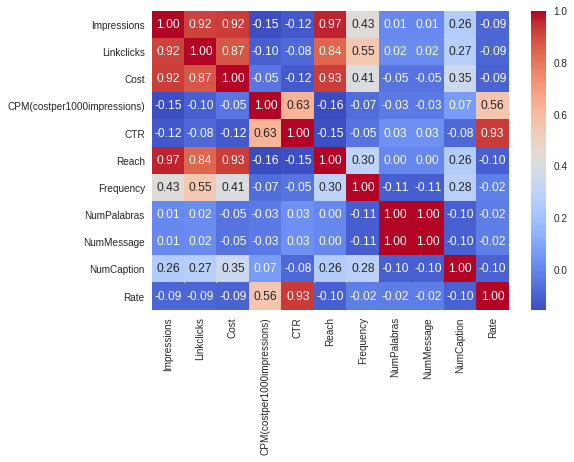

In [221]:
g=sns.heatmap(data[numerical_columns].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

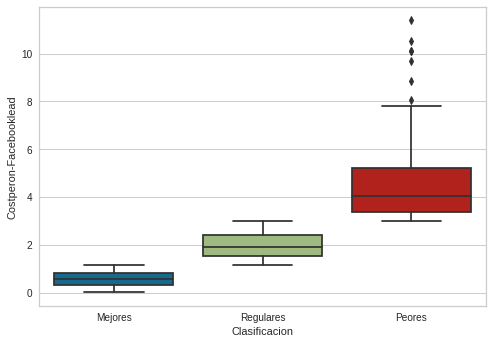

In [222]:
 sns.boxplot(y= data["Costperon-Facebooklead"] , x= data.Clasificacion, orient="v")

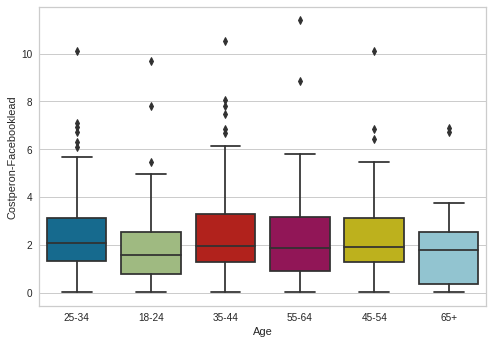

In [223]:
 sns.boxplot(y= data["Costperon-Facebooklead"] , x= data.Age, orient="v")

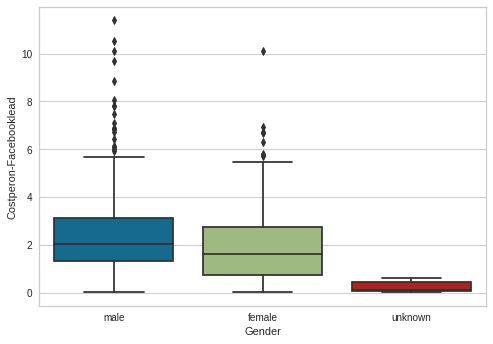

In [224]:
 sns.boxplot(y= data["Costperon-Facebooklead"] , x= data.Gender, orient="v")

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



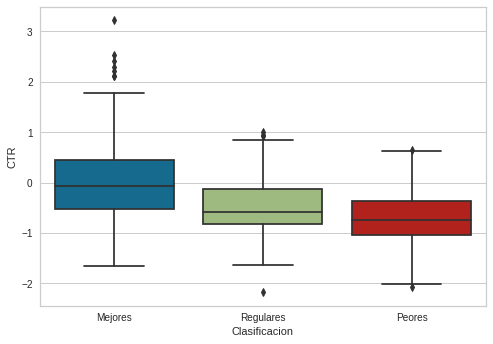

In [225]:
 sns.boxplot(y= np.log(data["CTR"]) , x= data.Clasificacion, orient="v")

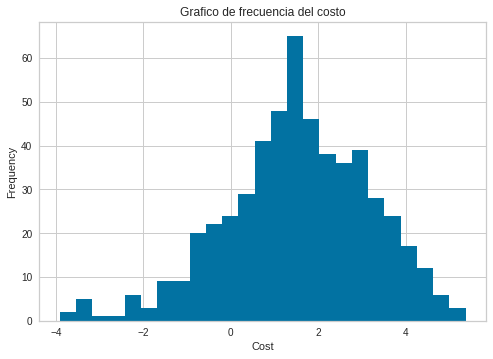

In [226]:
plt.hist(np.log(data['Cost']), bins = 25)
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.title("Grafico de frecuencia del costo")
plt.show()

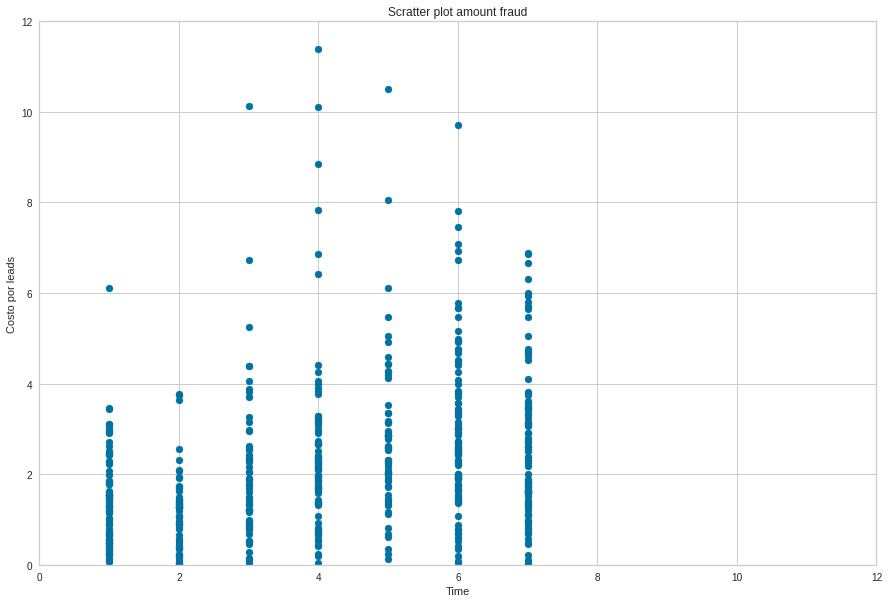

In [227]:
plt.figure(figsize=(15,10))
plt.scatter(data['Month'], data['Costperon-Facebooklead']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Costo por leads')
plt.xlim([0,12])
plt.ylim([0,12])
plt.show()

In [228]:
X = data[all_features]
y = data[labels]
all_features

['Promotedposttype',
 'Gender',
 'Age',
 'Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras',
 'Uniqueleads',
 'NumMessage',
 'NumCaption',
 'Rate']

In [229]:
#
# Create training/ test data split
#
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [230]:
X_train.shape


(373, 15)

In [231]:
y_train.shape

(373, 1)

In [232]:
type(X_train)

pandas.core.frame.DataFrame

In [233]:
prep = ColumnTransformer([('encoder', OneHotEncoder(), categorical_columns),
                   ('scaler', StandardScaler(),numerical_columns),],
                  remainder= 'drop')

In [234]:
numerical_columns

['Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras',
 'NumMessage',
 'NumCaption',
 'Rate']

In [235]:
prep


ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('encoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['Promotedposttype', 'Gender', 'Age']),
                                ('scaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['Impressions', 'Linkclicks', 'Cost',
                                  'CPM(costper1000impressions)', 'CTR', 'Reach',
                                  'Frequency', 'NumPalabras', 'NumMessage',
                                  'NumCaption', 'Rate'])],
            

### Croosvalidacion

In [236]:
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=123)

In [237]:
cv

RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123)

# CLASIFICACION


## Random Forest

In [238]:
model = RandomForestClassifier()


In [239]:
X_train.head()

,Promotedposttype,Gender,Age,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,Uniqueleads,NumMessage,NumCaption,Rate
2449,link,male,35-44,409,5,2.46,6.01,1.222494,396,1.03,33,1,33,8,0.002525
1817,link,male,25-34,55014,211,97.32,1.77,0.383539,33507,1.64,31,33,31,9,0.000985
166,link,male,55-64,262,4,0.54,2.06,1.526718,232,1.13,44,1,44,3,0.004310
1888,link,male,18-24,2558,12,2.87,1.12,0.469116,2112,1.21,39,1,39,4,0.000473
2481,link,female,45-54,267,1,1.74,6.52,0.374532,168,1.59,42,1,42,6,0.005952


In [240]:
y_train

,ClasificacionInt
2449,1
1817,1
166,2
1888,1
2481,1
...,...
1231,0
1728,2
1935,0
802,2


In [241]:
X_train_cp = X_train.copy()

X_train_cp = X_train_cp.drop('Uniqueleads',1)

In [242]:
grid = {'n_estimators' : [200], 'max_depth' : [3,4] , 'random_state' : [123]}

In [243]:
test_scores = []
#
for g in ParameterGrid(grid) :
  print(g)
  model.set_params(**g)
  reglog = Pipeline([('preproc', prep),
                  ('regLog', model)])

  
  reglog.fit(X_train_cp, y_train)

  test_scores.append(reglog.score(X_test,y_test))
  
  best_idx = np.argmax(test_scores)
  print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

{'max_depth': 3, 'n_estimators': 200, 'random_state': 123}


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.7329192546583851 {'random_state': 123, 'n_estimators': 200, 'max_depth': 3}
{'max_depth': 4, 'n_estimators': 200, 'random_state': 123}
0.782608695652174 {'random_state': 123, 'n_estimators': 200, 'max_depth': 4}


/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.



Ver el mejor parametro para usarlo en un entrnamiento del modelo

In [276]:
ParameterGrid(grid)[best_idx]

{'max_depth': 4, 'n_estimators': 200, 'random_state': 123}

In [277]:
  model = RandomForestClassifier(max_depth= 4, n_estimators = 200, random_state= 123)
  reglog = Pipeline([('preproc', prep),
                  ('regLog', model)])

In [295]:
reglog.fit(X_train_cp, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [279]:
metrics.accuracy_score(y_train, reglog.predict(X_train_cp))

0.8471849865951743

Graficar los features importantes

In [337]:
# sacar los nombres de los dummies
feature_names = reglog.named_steps["preproc"].named_transformers_["encoder"].get_feature_names()

In [334]:
#ver los nombres de las columnas para sacar solo los numericos
# se puede automatizar mejor viendo los tipos de datos de las columnas
X_train_cp.columns

Index(['Promotedposttype', 'Gender', 'Age', 'Impressions', 'Linkclicks',
       'Cost', 'CPM(costper1000impressions)', 'CTR', 'Reach', 'Frequency',
       'NumPalabras', 'NumMessage', 'NumCaption', 'Rate'],
      dtype='object')

In [342]:
feature_names = np.append( feature_names, values=['Impressions', 'Linkclicks',
       'Cost', 'CPM(costper1000impressions)', 'CTR', 'Reach', 'Frequency',
       'NumPalabras', 'NumMessage', 'NumCaption', 'Rate'])

In [344]:
importances = reglog.named_steps["regLog"].feature_importances_
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))


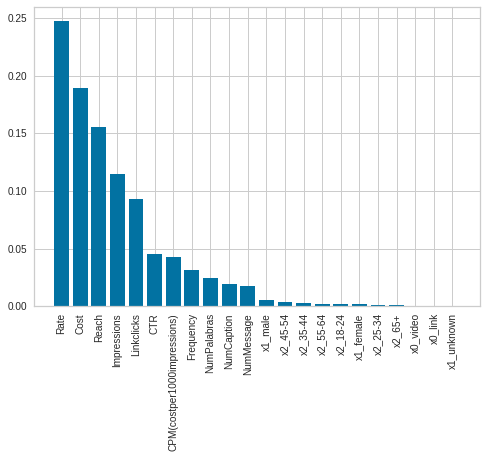

In [345]:
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

Fin graficar los features importantes

In [ ]:

sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
labels = np.array(feature_names)

In [280]:
confusion_matrix(y_train, reglog.predict(X_train_cp))

array([[ 55,  39,   0],
       [  1, 185,   0],
       [  0,  17,  76]])

In [281]:
print( classification_report(y_train, reglog.predict(X_train_cp)) )

              precision    recall  f1-score   support

           0       0.98      0.59      0.73        94
           1       0.77      0.99      0.87       186
           2       1.00      0.82      0.90        93

    accuracy                           0.85       373
   macro avg       0.92      0.80      0.83       373
weighted avg       0.88      0.85      0.84       373



In [282]:
X_test.head()

,Promotedposttype,Gender,Age,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,Uniqueleads,NumMessage,NumCaption,Rate
98,link,female,18-24,505,3,0.47,0.93,0.594059,232,2.18,46,2,46,4,0.008621
2826,link,male,25-34,5288,17,6.68,1.26,0.321483,2669,1.98,22,2,22,6,0.000749
2894,link,female,45-54,342,1,0.82,2.40,0.292398,168,2.04,1,1,1,1,0.005952
1497,link,male,35-44,17448,124,34.46,1.97,0.710683,11170,1.56,31,18,31,9,0.001611
1671,link,female,25-34,2197,14,6.71,3.05,0.637233,1368,1.61,46,6,46,4,0.004386


In [283]:
X_test_cp = X_test.copy()
X_test_cp = X_test_cp.drop('Uniqueleads',1)
y_pred=reglog.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.



In [284]:
X_test_cp.dtypes

Promotedposttype                object
Gender                          object
Age                             object
Impressions                      int64
Linkclicks                       int64
Cost                           float64
CPM(costper1000impressions)    float64
CTR                            float64
Reach                            int64
Frequency                      float64
NumPalabras                      int64
NumMessage                       int64
NumCaption                       int64
Rate                           float64
dtype: object

In [253]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.782608695652174


In [254]:
y_test.head()

,ClasificacionInt
98,2
2826,0
2894,2
1497,1
1671,2


In [255]:
evaluate_pd = X_test.copy()

In [256]:
evaluate_pd['y_test'] = y_test.ClasificacionInt

In [257]:
evaluate_pd['y_pred'] = y_pred

In [258]:
evaluate_pd.dtypes

Promotedposttype                object
Gender                          object
Age                             object
Impressions                      int64
Linkclicks                       int64
Cost                           float64
CPM(costper1000impressions)    float64
CTR                            float64
Reach                            int64
Frequency                      float64
NumPalabras                      int64
Uniqueleads                      int64
NumMessage                       int64
NumCaption                       int64
Rate                           float64
y_test                           int64
y_pred                           int64
dtype: object

In [259]:
import plotly.express as px

fig = px.scatter(evaluate_pd, x="Cost", y="Uniqueleads", color="y_test",
                 size='Cost', hover_data=['Frequency'])
fig.show()

In [260]:
import plotly.express as px

fig = px.scatter(evaluate_pd, x="Cost", y="Uniqueleads", color="y_pred",
                 size='Cost', hover_data=['Frequency'])
fig.show()

## Logistic regression multinomial

In [ ]:
X_train_cp.dtypes

Promotedposttype                object
Gender                          object
Age                             object
Impressions                      int64
Linkclicks                       int64
Cost                           float64
CPM(costper1000impressions)    float64
CTR                            float64
Reach                            int64
Frequency                      float64
NumPalabras                      int64
dtype: object

In [ ]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

reglog = Pipeline([('preproc', prep),
                  ('regLog', model)])


In [ ]:
reglog.fit(X_train_cp, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Promotedposttype', 'Gender',
                                                   'Age']),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
         

In [ ]:
metrics.accuracy_score(y_train, reglog.predict(X_train_cp))

0.6193029490616622

In [ ]:
confusion_matrix(y_train, reglog.predict(X_train_cp))

array([[ 22,  71,   1],
       [ 11, 157,  18],
       [  2,  39,  52]])

In [ ]:
print( classification_report(y_train, reglog.predict(X_train_cp)) )

              precision    recall  f1-score   support

           0       0.63      0.23      0.34        94
           1       0.59      0.84      0.69       186
           2       0.73      0.56      0.63        93

    accuracy                           0.62       373
   macro avg       0.65      0.55      0.56       373
weighted avg       0.63      0.62      0.59       373



In [ ]:
metrics.accuracy_score(y_test, reglog.predict(X_test_cp))

0.6149068322981367

In [ ]:
print( classification_report(y_test, reglog.predict(X_test_cp)) )

              precision    recall  f1-score   support

           0       0.47      0.17      0.25        40
           1       0.58      0.82      0.68        80
           2       0.79      0.63      0.70        41

    accuracy                           0.61       161
   macro avg       0.61      0.54      0.55       161
weighted avg       0.61      0.61      0.58       161



In [ ]:
y_pred = reglog.predict(X_test_cp)

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
y_predict_prob = reglog.predict_proba(X_test_cp)

In [ ]:
y_predict_prob[0]

array([0.09991327, 0.39677487, 0.50331186])

In [ ]:
# Revision de una variable contra la otra

### Elastic Net

In [ ]:
enet_pipe = Pipeline([('preproc', prep),
                  ('regLog', LogisticRegression(penalty= 'elasticnet', solver= 'saga', 
                                                max_iter=500))])

In [ ]:
enet_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preproc', 'regLog', 'preproc__n_jobs', 'preproc__remainder', 'preproc__sparse_threshold', 'preproc__transformer_weights', 'preproc__transformers', 'preproc__verbose', 'preproc__encoder', 'preproc__scaler', 'preproc__encoder__categories', 'preproc__encoder__drop', 'preproc__encoder__dtype', 'preproc__encoder__handle_unknown', 'preproc__encoder__sparse', 'preproc__scaler__copy', 'preproc__scaler__with_mean', 'preproc__scaler__with_std', 'regLog__C', 'regLog__class_weight', 'regLog__dual', 'regLog__fit_intercept', 'regLog__intercept_scaling', 'regLog__l1_ratio', 'regLog__max_iter', 'regLog__multi_class', 'regLog__n_jobs', 'regLog__penalty', 'regLog__random_state', 'regLog__solver', 'regLog__tol', 'regLog__verbose', 'regLog__warm_start'])

In [ ]:
enet_grid = dict(
regLog__C = [1e-9, 1e-5, 1e-1,0.001, 0.01, 0.1, 1.0],
regLog__l1_ratio = [0.0001,0.1, 0.5, 0.9] ) 

In [ ]:
enet_tuned = GridSearchCV(enet_pipe, enet_grid, cv=cv, n_jobs=-1)

In [ ]:
enet_tuned.fit(X_train_cp, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preproc',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                         

In [ ]:
metrics.accuracy_score(y_train, enet_tuned.predict(X_train_cp))

0.5924932975871313

In [ ]:
print( classification_report(y_train, enet_tuned.predict(X_train_cp)) )

              precision    recall  f1-score   support

           0       0.59      0.14      0.22        94
           1       0.57      0.88      0.69       186
           2       0.71      0.47      0.57        93

    accuracy                           0.59       373
   macro avg       0.62      0.50      0.49       373
weighted avg       0.61      0.59      0.54       373



In [ ]:
metrics.accuracy_score(y_test, enet_tuned.predict(X_test_cp))

0.5900621118012422

In [ ]:
print( classification_report(y_test, enet_tuned.predict(X_test_cp)) )

              precision    recall  f1-score   support

           0       0.62      0.12      0.21        40
           1       0.55      0.89      0.68        80
           2       0.76      0.46      0.58        41

    accuracy                           0.59       161
   macro avg       0.65      0.49      0.49       161
weighted avg       0.62      0.59      0.54       161



In [ ]:
# ver visualmente los resultados de la clasificacion

# Clusterizacion

https://www.kaggle.com/prashant111/k-means-clustering-with-python

In [ ]:
list_cols = numerical_columns
list_cols

['Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras']

In [ ]:
# Select the ones you want
df_features = data[list_cols]

In [ ]:
df_features.head(10)

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras
389,226,3,0.32,1.42,1.327434,193,1.17,25
399,4608,14,4.60,1.00,0.303819,2525,1.82,48
401,1749,4,3.67,2.10,0.228702,1172,1.49,48
402,15951,73,21.01,1.32,0.457652,9362,1.70,48
404,795,10,1.94,2.44,1.257862,516,1.54,48
405,6530,47,12.41,1.90,0.719755,4069,1.60,48
408,2849,15,2.72,0.96,0.526501,2012,1.42,40
410,985,3,1.79,1.82,0.304569,796,1.24,40
411,8584,48,10.31,1.20,0.559180,6173,1.39,40
414,2202,11,3.59,1.63,0.499546,1672,1.32,40


## **EDA**

Revisar la matriz de distancias (pendiente la version en Python)

Revisar la correlacion de las variables

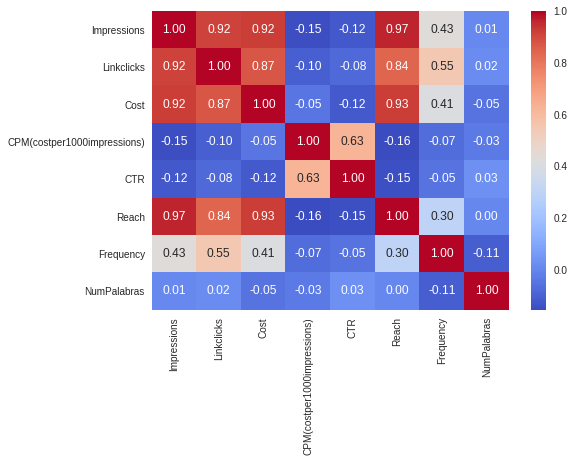

In [ ]:
g=sns.heatmap(df_features[list_cols].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

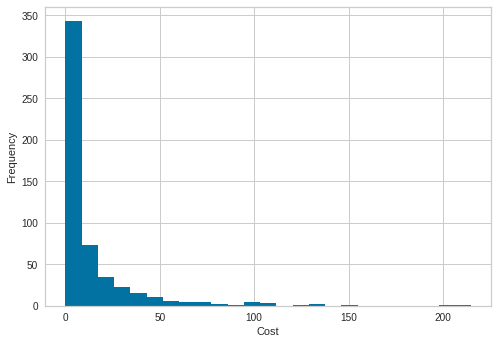

In [ ]:
# histograma del costo  pagado por la publicacion
plt.hist(df_features['Cost'], bins = 25)
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()

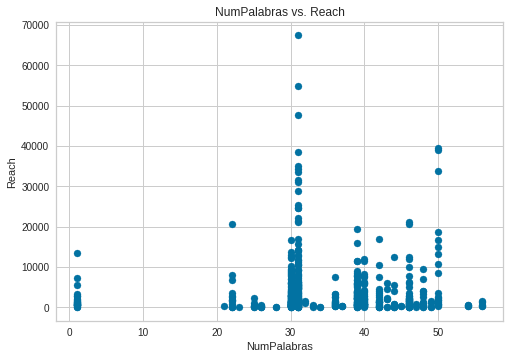

In [ ]:
# Revisar la relación entre el numero de palabras de la publicación y los anuncios visualizados
plt.scatter(df_features["NumPalabras"], df_features["Reach"])
plt.title("NumPalabras vs. Reach")
plt.xlabel("NumPalabras")
plt.ylabel("Reach")
plt.show()

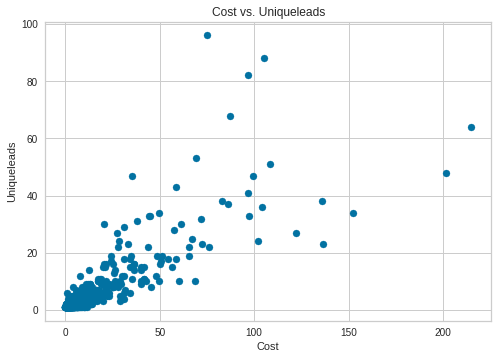

In [ ]:
plt.scatter(data["Cost"], data["Uniqueleads"])
plt.title("Cost vs. Uniqueleads")
plt.xlabel("Cost")
plt.ylabel("Uniqueleads")
plt.show()

In [ ]:
fig = px.histogram(df_features,x='Cost',nbins=25,title='Histograma',)
fig.show()

Poner en escala estandar la data

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

In [ ]:
df_scaled_features = pd.DataFrame(data=scaled_features, columns=list_cols)

In [ ]:
df_scaled_features.head()

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras
0,-0.502993,-0.525694,-0.555599,-0.572279,0.245861,-0.555987,-0.881613,-0.956114
1,-0.205045,-0.382002,-0.383309,-0.845302,-0.408014,-0.235925,0.572313,1.275546
2,-0.399439,-0.512631,-0.420746,-0.130242,-0.455998,-0.421622,-0.165834,1.275546
3,0.566209,0.388705,0.277270,-0.637285,-0.309748,0.702437,0.303896,1.275546
4,-0.464305,-0.434254,-0.490386,0.090776,0.201419,-0.511656,-0.053993,1.275546


## Usando K-means

Metodo de Elbow para Escoger el número de clusters

In [ ]:
kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 42,
   ...: }

In [ ]:
  ...: # Una lista de valores para WSSE values for each k
   ...: sse = []
   ...: for k in range(1, 11):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(scaled_features)
   ...:     sse.append(kmeans.inertia_)
   ...:     print('WSS '+ str(k) + ':' + str(kmeans.inertia_) )

WSS 1:4272.0
WSS 2:2873.497892782259
WSS 3:2440.025510399217
WSS 4:2027.5381095952364
WSS 5:1746.2343319597646
WSS 6:1574.599350797746
WSS 7:1439.3030468971406
WSS 8:1322.7370463356397
WSS 9:1248.9495725369386
WSS 10:956.9615704718665


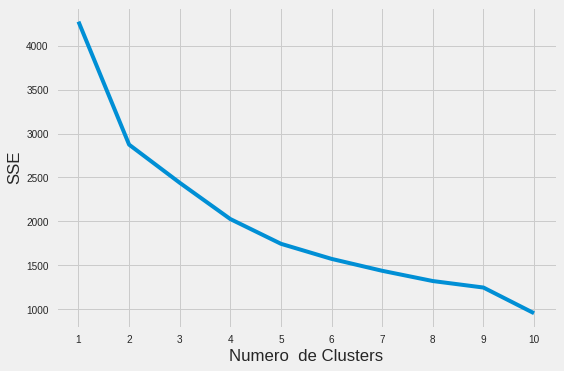

In [ ]:
# Metodo del codo  en otros se llama wss

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Numero  de Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
range(1, 11), sse, curve="convex", direction="decreasing")

In [ ]:
kl.elbow

4

In [ ]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42
)

In [ ]:
y_kmeans = kmeans.fit(scaled_features)

In [ ]:
# The lowest SSE value
   ...: kmeans.inertia_

2440.025510399217

In [ ]:
 # Final locations of the centroid
   ...: kmeans.cluster_centers_

array([[ 0.84808278,  1.07563021,  0.99393289, -0.12097709, -0.13951017,
         0.80072694,  1.25055532, -0.11631414],
       [-0.32862365, -0.35708626, -0.34843827,  0.03732742,  0.03830088,
        -0.31620932, -0.29201692,  0.02383068],
       [ 4.54548089,  4.04542907,  4.27021131, -0.37336269, -0.29390626,
         4.46261233,  1.1568664 , -0.01170159]])

In [ ]:
# The number of iterations required to converge
   ...: kmeans.n_iter_

17

In [ ]:
df_scaled_features_new = df_scaled_features.copy()

In [ ]:
df_features_new = df_features.copy()

In [ ]:
df_features_new['labels']  =  y_kmeans.fit_predict(scaled_features)
data['labels'] = y_kmeans.fit_predict(scaled_features)

In [ ]:
df_features_new.head()

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,labels
389,226,3,0.32,1.42,1.327434,193,1.17,25,1
399,4608,14,4.60,1.00,0.303819,2525,1.82,48,1
401,1749,4,3.67,2.10,0.228702,1172,1.49,48,1
402,15951,73,21.01,1.32,0.457652,9362,1.70,48,0
404,795,10,1.94,2.44,1.257862,516,1.54,48,1


In [ ]:
data.head()

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,CTR,NumPalabras,Clasificacion,ClasificacionInt,labels
389,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,2021-03-17,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1.327434,25,Mejores,2,1
399,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,0.303819,48,Regulares,1,1
401,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,3.67,1749,1172,1.49,4,2,2.10,1.84,0.228702,48,Regulares,1,1
402,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,21.01,15951,9362,1.70,73,8,1.32,2.63,0.457652,48,Regulares,1,0
404,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,1.94,795,516,1.54,10,3,2.44,0.65,1.257862,48,Mejores,2,1


Datos agrupados por cluster

In [ ]:
cluster_agg =df_features_new.groupby("labels")
cluster_agg.agg(func="mean")


,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras
labels,,,,,,,,
0,20096.586207,125.586207,38.813218,2.114253,0.724151,10078.149425,2.123218,33.655172
1,2790.495370,15.907407,5.466250,2.357778,1.002507,1940.043981,1.433588,35.099537
2,74475.066667,352.933333,120.202000,1.726000,0.482450,36759.000000,2.081333,34.733333


In [ ]:
df_scaled_features_new['labels']  =  y_kmeans.fit_predict(scaled_features)

In [ ]:
df_scaled_features_new.head()

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,labels
0,-0.502993,-0.525694,-0.555599,-0.572279,0.245861,-0.555987,-0.881613,-0.956114,1
1,-0.205045,-0.382002,-0.383309,-0.845302,-0.408014,-0.235925,0.572313,1.275546,1
2,-0.399439,-0.512631,-0.420746,-0.130242,-0.455998,-0.421622,-0.165834,1.275546,1
3,0.566209,0.388705,0.277270,-0.637285,-0.309748,0.702437,0.303896,1.275546,0
4,-0.464305,-0.434254,-0.490386,0.090776,0.201419,-0.511656,-0.053993,1.275546,1


In [ ]:
data.sort_index( ascending=True).head()

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,CTR,NumPalabras,Clasificacion,ClasificacionInt,labels
389,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,2021-03-17,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1.327434,25,Mejores,2,1
399,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,0.303819,48,Regulares,1,1
401,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,3.67,1749,1172,1.49,4,2,2.10,1.84,0.228702,48,Regulares,1,1
402,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,21.01,15951,9362,1.70,73,8,1.32,2.63,0.457652,48,Regulares,1,0
404,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,1.94,795,516,1.54,10,3,2.44,0.65,1.257862,48,Mejores,2,1


In [ ]:
data.dtypes

Year                                    int64
Year&month                             object
CampaignID                              int64
Campaignname                           object
Campaignobjective                      object
AdsetID                                 int64
Adsetname                              object
AdID                                    int64
Adname                                 object
Promotedposttype                       object
Promotedpostcreateddate        datetime64[ns]
Promotedpostdescription                object
Promotedpostmessage                    object
Promotedpostcaption                    object
Adsetstarttime                 datetime64[ns]
Adsetendtime                   datetime64[ns]
Adsettargeting                         object
Targetingminimumage                     int64
Targetingmaximumage                     int64
Age                                    object
Gender                                 object
Cost                              

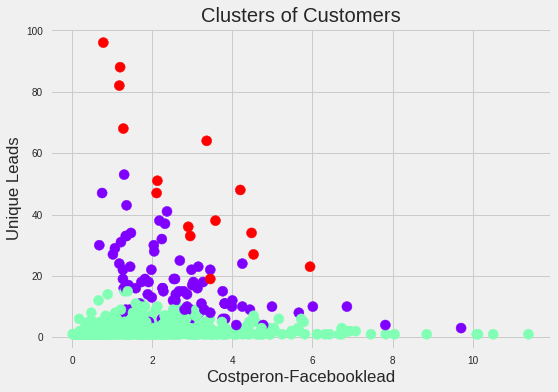

In [ ]:
# Visualiza el cluster entre clicks vs los leads unicos obtenidos

plt.scatter(data['Costperon-Facebooklead'], data['Uniqueleads'], s=100, c=data['labels'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Costperon-Facebooklead')
plt.ylabel('Unique Leads')
plt.show()

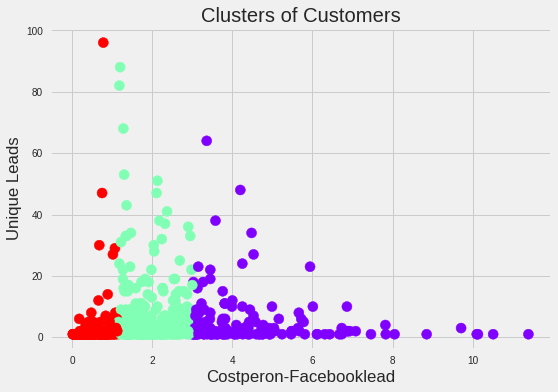

In [ ]:
# Visualiza el cluster entre clicks vs los leads unicos obtenidos con el campo de Clasificacion

plt.scatter(data['Costperon-Facebooklead'], data['Uniqueleads'], s=100, c=data['ClasificacionInt'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Costperon-Facebooklead')
plt.ylabel('Unique Leads')
plt.show()

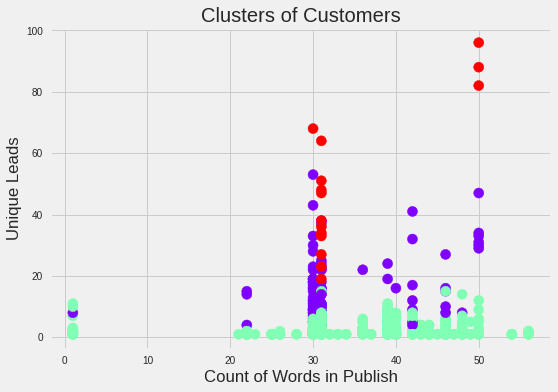

In [ ]:
#Visualizando el cluster: numero de palabras vers los leads unicos

plt.scatter(data['NumPalabras'], data['Uniqueleads'], s=100, c=data['labels'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.


plt.title('Clusters of Customers')
plt.xlabel('Count of Words in Publish')
plt.ylabel('Unique Leads')
plt.show()

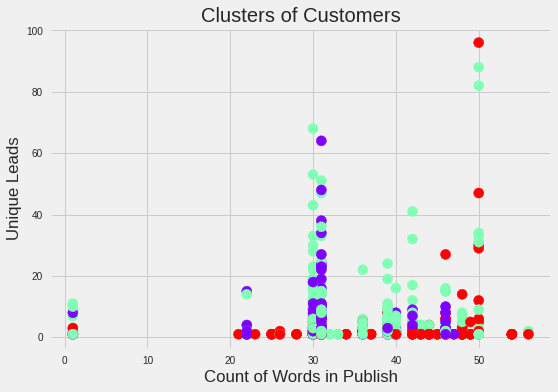

In [ ]:
#Visualizando el cluster: numero de palabras vers los leads unicos

plt.scatter(data['NumPalabras'], data['Uniqueleads'], s=100, c=data['ClasificacionInt'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.


plt.title('Clusters of Customers')
plt.xlabel('Count of Words in Publish')
plt.ylabel('Unique Leads')
plt.show()

No es muy clara la separación de los clusters, sin embargo se ve que cuando hay 30 palabras en promedio se obtienen un mayor numero de leads, se graficará considerando el costo y la frecuencia de visita usando plotly

In [ ]:
import plotly.express as px

fig = px.scatter(data, x="NumPalabras", y="Uniqueleads", color="labels",
                 size='Cost', hover_data=['NumPalabras'])
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(data, x="NumPalabras", y="Uniqueleads", color="ClasificacionInt",
                 size='Cost', hover_data=['NumPalabras'])
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(data, x="NumPalabras", y="Uniqueleads", color="ClasificacionInt",
                 size='Cost', hover_data=['Frequency'])
fig.show()

No es muy clara la separación de los clusters, sin embargo se ve que cuando hay 30 palabras en promedio se obtienen un mayor numero de leads, se graficará considerando el costo y la frecuencia de visita usando plotly

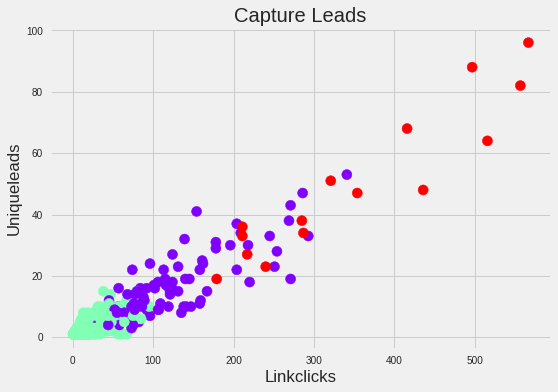

In [ ]:
#6 Visualising the clusters

plt.scatter(data['Linkclicks'], data['Uniqueleads'], s=100, c=data['labels'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

plt.title('Capture Leads')
plt.xlabel('Linkclicks')
plt.ylabel('Uniqueleads')
plt.show()

**Grafico de Cluster - Plotly relacion Clicks y Unique Leads**

In [ ]:
import plotly.express as px

fig = px.scatter(data, x="Cost", y="Uniqueleads", color="labels",
                 size='Reach', hover_data=['Linkclicks'])
fig.show()

**Coeficiente de silhohouette**

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster
How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

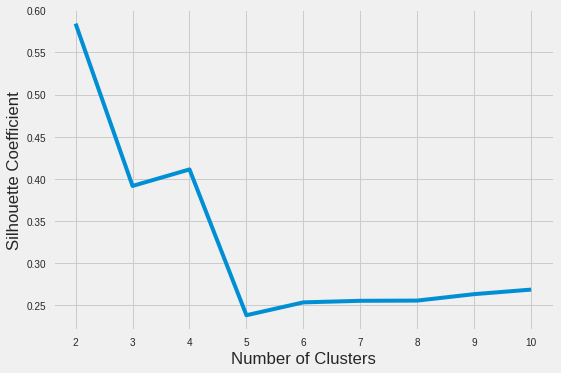

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
x <- seq(0, 2*pi, length.out=50)
x

 [1] 0.0000000 0.1282283 0.2564565 0.3846848 0.5129131 0.6411414 0.7693696
 [8] 0.8975979 1.0258262 1.1540544 1.2822827 1.4105110 1.5387393 1.6669675
[15] 1.7951958 1.9234241 2.0516523 2.1798806 2.3081089 2.4363372 2.5645654
[22] 2.6927937 2.8210220 2.9492502 3.0774785 3.2057068 3.3339351 3.4621633
[29] 3.5903916 3.7186199 3.8468481 3.9750764 4.1033047 4.2315330 4.3597612
[36] 4.4879895 4.6162178 4.7444460 4.8726743 5.0009026 5.1291309 5.2573591
[43] 5.3855874 5.5138157 5.6420439 5.7702722 5.8985005 6.0267288 6.1549570
[50] 6.2831853


In [ ]:
%%R
print(installed.packages())

              Package         LibPath                         Version   
IRdisplay     "IRdisplay"     "/usr/local/lib/R/site-library" "1.0"     
IRkernel      "IRkernel"      "/usr/local/lib/R/site-library" "1.2"     
pbdZMQ        "pbdZMQ"        "/usr/local/lib/R/site-library" "0.3-5"   
repr          "repr"          "/usr/local/lib/R/site-library" "1.1.3"   
askpass       "askpass"       "/usr/lib/R/site-library"       "1.1"     
assertthat    "assertthat"    "/usr/lib/R/site-library"       "0.2.1"   
backports     "backports"     "/usr/lib/R/site-library"       "1.2.1"   
base64enc     "base64enc"     "/usr/lib/R/site-library"       "0.1-3"   
BH            "BH"            "/usr/lib/R/site-library"       "1.75.0-0"
blob          "blob"          "/usr/lib/R/site-library"       "1.2.1"   
brew          "brew"          "/usr/lib/R/site-library"       "1.0-6"   
brio          "brio"          "/usr/lib/R/site-library"       "1.1.2"   
broom         "broom"         "/usr/lib/R/site-libr

In [ ]:
%%R
install.packages("NbClust")
library(NbClust)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/NbClust_3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 22211 bytes (21 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [ ]:
%%R

library(NbClust)

In [ ]:
%%R

sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] NbClust_3.0

loaded via a namespace (and not attached):
[1] compiler_4.1.0


In [ ]:
%%R
install.packages("car") 

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/matrixStats_0.59.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 194487 bytes (189 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]

In [ ]:
%%R
install.packages("factoextra")
library(factoextra)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘lazyeval’, ‘later’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/lazyeval_0.2.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 83482 bytes (81 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

# Prediccion  Regression

https://www.kaggle.com/mansimeena/facebook-ad-campaigns-analysis-sales-prediction

https://www.kaggle.com/gauravduttakiit/predicting-stock-prices-using-facebook-s-prophet (Graficas)

https://www.kaggle.com/ymlai87416/web-traffic-time-series-forecast-with-4-model (Entendimiento)

https://www.kaggle.com/zoupet/predictive-analysis-with-different-approaches

https://www.kaggle.com/manovirat/timeseries-using-prophet-hyperparameter-tuning

# OTROS: Analisis de comentarios (si alcanzamos) 

https://www.kaggle.com/mortena/facebook-comments-sentiment-analysis